In [9]:
from root_pandas import read_root
import ROOT
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [10]:
#load files

signalfile = "recsigmasignalfinal.root"
ccbar = "savir_CCbarBkg1.root"
uubar = "savir_UUbarBkg1.root"
ddbar = "savir_DDbarBkg1.root"
ssbar = "savir_SSbarBkg1.root"
mixed = "savir_MixedBkg1.root"
charged = "savir_chargedBkg1.root"

#columns we need
mycols = ['xic_isSignal','xic_M','sigma_mcDecayVertexFromIPDistance','sigma_significanceOfDistance','sigma_M','xic_dr','sigma_p_nCDCHits','gamma1_clusterConnectedRegionID','gamma1_clusterErrorPhi','gamma2_clusterErrorPhi']

df = read_root(signalfile, key="xic_tree",columns=mycols)
df_ccbar = read_root(ccbar, key="xic_tree", columns=mycols)
df_uubar = read_root(uubar, key="xic_tree", columns=mycols)
df_ddbar = read_root(ddbar, key="xic_tree", columns=mycols)
df_ssbar = read_root(ssbar, key="xic_tree", columns=mycols)
df_mixed = read_root(mixed, key="xic_tree", columns=mycols)
df_charged = read_root(charged, key="xic_tree", columns=mycols)


In [11]:
def plotSignalBackground(var):
    

    # Make nice looking plots
    plt.rcParams.update({
              'font.size': 20,
              'figure.figsize': (10, 8),
    })


    signal = '(xic_isSignal==1)'
    cuts = 'xic_M >2.3 & xic_M<2.7'
    nbins=100
    myrange=(0,1)

    ax = plt.subplot()

    # define a numpy array from the "M" column in the dataframe
    #run over new MC
    nptrue = df.query(cuts+'and xic_isSignal==1')[var].to_numpy()
    np_dd= df_ddbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_uu= df_uubar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_ss= df_ssbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_cc= df_ccbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_charged = df_charged.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_mixed = df_mixed.query(cuts+' and not xic_isSignal==1')[var].to_numpy()

    mycolor = 0
    testvalue = min(nptrue)
    for i in range(250):
        cuts = f"xic_M >2.3 & xic_M<2.7 & {var} > {testvalue}"

        nptrue = df.query(cuts+'and xic_isSignal==1')[var].to_numpy()
        np_dd= df_ddbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
        np_uu= df_uubar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
        np_ss= df_ssbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
        np_cc= df_ccbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
        np_charged = df_charged.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
        np_mixed = df_mixed.query(cuts+' and not xic_isSignal==1')[var].to_numpy()

        signal_efficiency = (len(nptrue))/signal_without_cuts
        background_rejection = 1-((len(np_dd)+len(np_uu)+len(np_ss)+len(np_cc)+len(np_charged)+len(np_mixed))/bkg_without_cuts)


        ax.scatter(signal_efficiency,background_rejection,color=str(mycolor))

        testvalue+=((max(nptrue)-min(nptrue))/250)
        mycolor+=0.0036

    plt.xlim(myrange)
    plt.ylim(myrange)
    plt.xlabel('Signal Efficiency')
    plt.ylabel('Background Rejection')
    plt.show()

#PLOT OF SIGNAL VS BACKGROUND

In [12]:
def plotAllCuts(var):
    

    # Make nice looking plots
    plt.rcParams.update({
              'font.size': 20,
              'figure.figsize': (10, 8),
    })


    signal = '(xic_isSignal==1)'
    cuts = 'xic_M >2.3 & xic_M<2.7'
    nbins=100

    ax = plt.subplot()

    # define a numpy array from the "M" column in the dataframe
    #run over new MC
    nptrue = df.query(cuts+'and xic_isSignal==1')[var].to_numpy()
    np_dd= df_ddbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_uu= df_uubar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_ss= df_ssbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_cc= df_ccbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_charged = df_charged.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_mixed = df_mixed.query(cuts+' and not xic_isSignal==1')[var].to_numpy()

    myrange=(min(nptrue),max(nptrue))

    mycolor = 0
    testvalue = min(nptrue)
    mytestvalue=[]
    mytotal=[]
    #range 251
    for i in range(250):
        cuts = f"xic_M >2.3 & xic_M<2.7 & {var} > {testvalue}"

        nptrue = df.query(cuts+'and xic_isSignal==1')[var].to_numpy()
        np_dd= df_ddbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
        np_uu= df_uubar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
        np_ss= df_ssbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
        np_cc= df_ccbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
        np_charged = df_charged.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
        np_mixed = df_mixed.query(cuts+' and not xic_isSignal==1')[var].to_numpy()

        signal_efficiency = (len(nptrue))/signal_without_cuts
        background_rejection = 1-((len(np_dd)+len(np_uu)+len(np_ss)+len(np_cc)+len(np_charged)+len(np_mixed))/bkg_without_cuts)
        total=signal_efficiency+background_rejection

        ax.scatter(testvalue,total,color=str(mycolor))

        mytestvalue.append(testvalue)
        mytotal.append(total)

        testvalue+=((max(nptrue)-min(nptrue))/250)
        mycolor+=0.0036

    plt.xlim(myrange)
    plt.xlabel(var)
    plt.ylabel('Signal Efficiency + Background rejection')
    plt.show()

    print(max(mytotal))
    print(mytestvalue[mytotal.index(max(mytotal))])

#PLOT OF CUT VALUE VS SIG+BKG

In [13]:
def optimalCut(var):
    

    signal = '(xic_isSignal==1)'
    cuts = 'xic_M >2.3 & xic_M<2.7'

    # define a numpy array from the "M" column in the dataframe
    #run over new MC
    nptrue = df.query(cuts+'and xic_isSignal==1')[var].to_numpy()
    np_dd= df_ddbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_uu= df_uubar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_ss= df_ssbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_cc= df_ccbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_charged = df_charged.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_mixed = df_mixed.query(cuts+' and not xic_isSignal==1')[var].to_numpy()

    myrange=(min(nptrue),max(nptrue))
    
    mycolor = 0
    testvalue = min(nptrue)
    mytestvalue=[]
    mytotal=[]

    for i in range(250):
        cuts = f"xic_M >2.3 & xic_M<2.7 & {var} > {testvalue}"

        nptrue = df.query(cuts+'and xic_isSignal==1')[var].to_numpy()
        np_dd= df_ddbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
        np_uu= df_uubar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
        np_ss= df_ssbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
        np_cc= df_ccbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
        np_charged = df_charged.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
        np_mixed = df_mixed.query(cuts+' and not xic_isSignal==1')[var].to_numpy()

        signal_efficiency = (len(nptrue))/signal_without_cuts
        background_rejection = 1-((len(np_dd)+len(np_uu)+len(np_ss)+len(np_cc)+len(np_charged)+len(np_mixed))/bkg_without_cuts)
        total=signal_efficiency+background_rejection

        mytestvalue.append(testvalue)
        mytotal.append(total)

        testvalue+=((max(nptrue)-min(nptrue))/250)
        mycolor+=0.0036


    print(var+": "+str(max(mytotal)))
    print(mytestvalue[mytotal.index(max(mytotal))])
#CALCULATE OPTIMAL CUT VALUE (>) AND PRINT

In [14]:
def plotVar(var, var_range, mycuts):
    
    # Make nice looking plots
    plt.rcParams.update({
              'font.size': 20,
              'figure.figsize': (10, 8),
    })


    signal = '(xic_isSignal==1)'
    cuts = mycuts
    nbins=100
    myrange=var_range

    ax = plt.subplot()

    # define a numpy array from the "M" column in the dataframe
    #run over new MC
    nptrue = df.query(cuts+'and xic_isSignal==1')[var].to_numpy()
    np_dd= df_ddbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_uu= df_uubar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_ss= df_ssbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_cc= df_ccbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_charged = df_charged.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_mixed = df_mixed.query(cuts+' and not xic_isSignal==1')[var].to_numpy()

    scale = 1 # scale factor by eye
    wnp_dd = [scale] * len(np_dd)
    wnp_uu = [scale] * len(np_uu)
    wnp_ss = [scale] * len(np_ss)
    wnp_cc = [scale] * len(np_cc)
    wnp_charged = [scale]*len(np_charged)
    wnp_mixed = [scale]*len(np_mixed)
    wnptrue = [scale] * len(nptrue)


    # use the numpy data to create a matplotlib histogram
    ax.hist([np_dd, np_uu, np_ss, np_cc, np_charged, np_mixed, nptrue], bins=nbins, range=myrange,
            label=["ddbar", "uubar", "ssbar", "ccbar","charged","mixed", "signal"], weights= [wnp_dd, wnp_uu, wnp_ss, wnp_cc, wnp_charged, wnp_mixed, wnptrue], stacked=True)


    plt.xlim(myrange)

    plt.ylabel('Number of Events')
    plt.xlabel(var)
    plt.legend()

    plt.show()

#PLOT A VARIABLE - STANDARD GRAPH

In [15]:
def optimalCutLess(var):
    

    signal = '(xic_isSignal==1)'
    cuts = 'xic_M >2.3 & xic_M<2.7'

    # define a numpy array from the "M" column in the dataframe
    #run over new MC
    nptrue = df.query(cuts+'and xic_isSignal==1')[var].to_numpy()
    np_dd= df_ddbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_uu= df_uubar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_ss= df_ssbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_cc= df_ccbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_charged = df_charged.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_mixed = df_mixed.query(cuts+' and not xic_isSignal==1')[var].to_numpy()

    myrange=(min(nptrue),max(nptrue))

    mycolor = 0
    testvalue = max(nptrue)
    mytestvalue=[]
    mytotal=[]

    for i in range(250):
        cuts = f"xic_M >2.3 & xic_M<2.7 & {var} < {testvalue}"

        nptrue = df.query(cuts+'and xic_isSignal==1')[var].to_numpy()
        np_dd= df_ddbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
        np_uu= df_uubar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
        np_ss= df_ssbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
        np_cc= df_ccbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
        np_charged = df_charged.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
        np_mixed = df_mixed.query(cuts+' and not xic_isSignal==1')[var].to_numpy()

        signal_efficiency = (len(nptrue))/signal_without_cuts
        background_rejection = 1-((len(np_dd)+len(np_uu)+len(np_ss)+len(np_cc)+len(np_charged)+len(np_mixed))/bkg_without_cuts)
        total=signal_efficiency+background_rejection

        mytestvalue.append(testvalue)
        mytotal.append(total)

        testvalue-=((max(nptrue)-min(nptrue))/250)
        mycolor+=0.0036


    print(var+": "+str(max(mytotal)))
    print(mytestvalue[mytotal.index(max(mytotal))])
#CALCULATE OPTIMAL CUT VALUE (<) AND PRINT

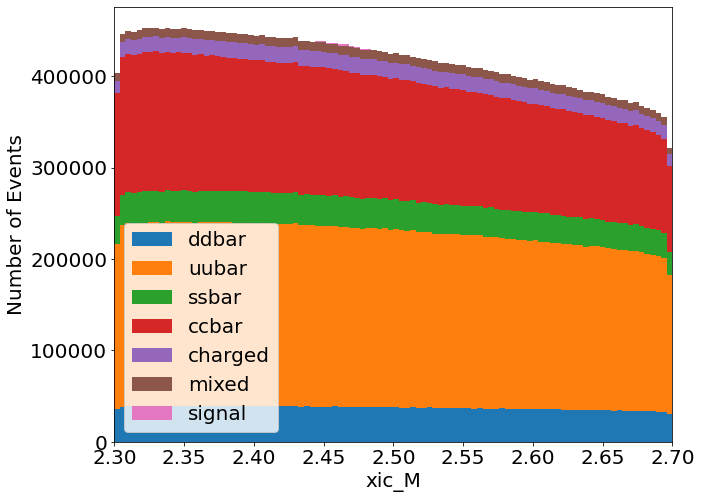

In [16]:
#Before selection criteria
cuts = 'xic_M >2.3 & xic_M<2.7'
plotVar('xic_M',(2.3, 2.7), cuts)

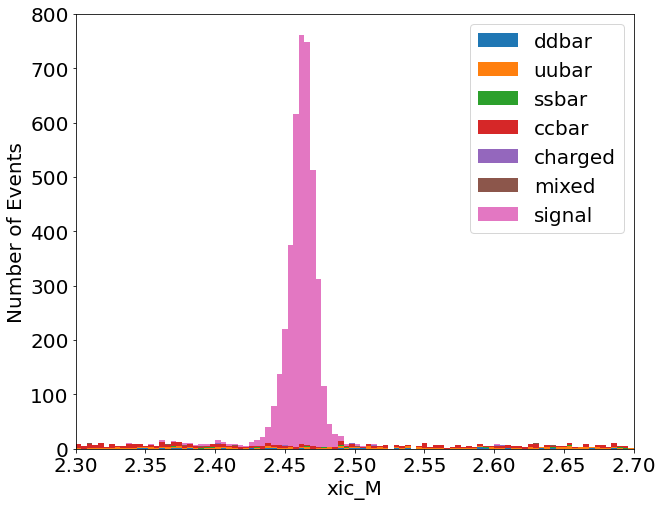

In [17]:
#After selection criteria
cuts = 'xic_M >2.3 & xic_M<2.7 & sigma_mcDecayVertexFromIPDistance > 0.1441 & sigma_significanceOfDistance > 4.07 & sigma_M > 1.173 & sigma_M < 1.194 & xic_dr > 0.00833988 & sigma_p_nCDCHits > 52.228 & gamma1_clusterConnectedRegionID < 18.992 & gamma1_clusterErrorPhi < 0.0108859 & gamma2_clusterErrorPhi < 0.0108859'
plotVar('xic_M',(2.3, 2.7), cuts)